# Random Forest Project 

For this project publicly available data from [LendingClub.com](https://www.lendingclub.com/) will be explored. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor I would want to invest in people who showed a profile of having a high probability of paying you back. I create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

The lending data from 2007-2010 is used and classification and prediction whether or not the borrower paid back their loan in full is implemented. The data can be downloaded from [here](https://www.lendingclub.com/info/download-data.action) or the csv already provided can be used. It's recommended the CSV provided to be used as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Data to a Dataframe

In [2]:
df = pd.read_csv('loan_data.csv')

#### printing the head of the dataframe:

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### printing the *info()* and the *describe()* of the data:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Notice: The column/feature that will be predicted later on ML is the 'not.fully.paid'. It actually the column that depicts if the person has fully paid back the loan or not.

## Exploratory Data Analysis

Use seaborn and pandas built-in plotting capabilities.

### Creating a histogram of two FICO distributions on top of each other, one for each *credit.policy* outcome:

Note: I use the pandas built in *.hist()*

Text(0.5, 0, 'FICO')

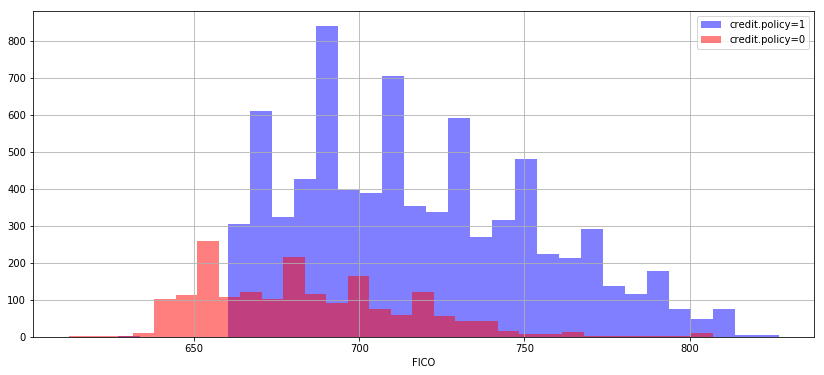

In [6]:
plt.figure(figsize=(14,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='credit.policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red', bins=30,label='credit.policy=0')
plt.legend()
plt.xlabel('FICO')

### Creating a similar figure, except this time selecting by the *not.fully.paid* column:

Text(0.5, 0, 'FICO')

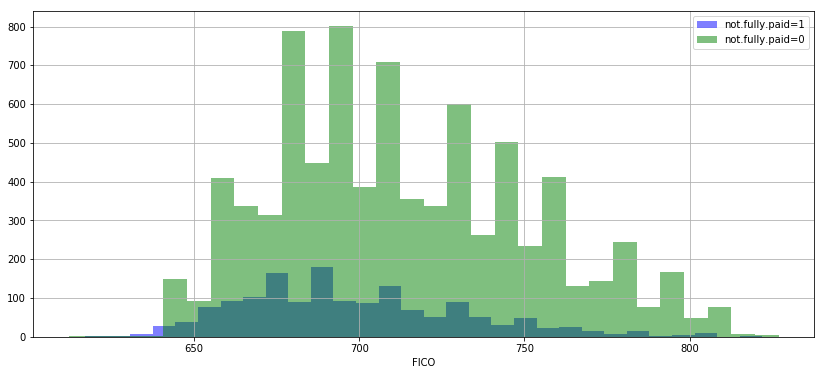

In [7]:
plt.figure(figsize=(14,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='green', bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

### Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by *not.fully.paid*: 

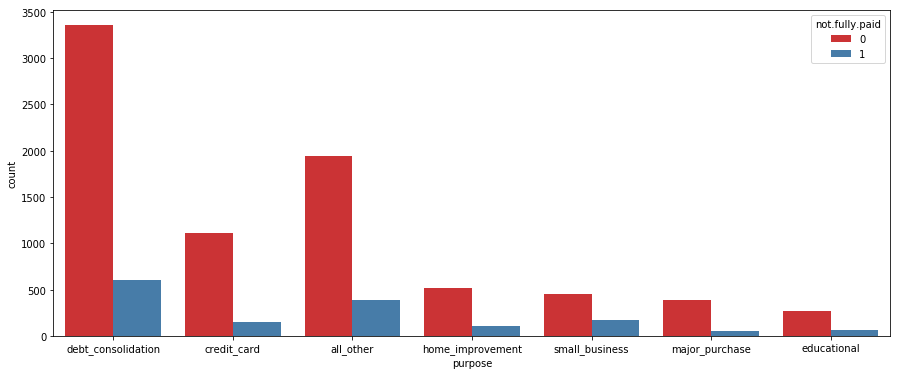

In [8]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='purpose',hue='not.fully.paid', palette='Set1')

### Seeing the trend between FICO score and interest rate by recreate the following jointplot:

/home/iotlab_user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


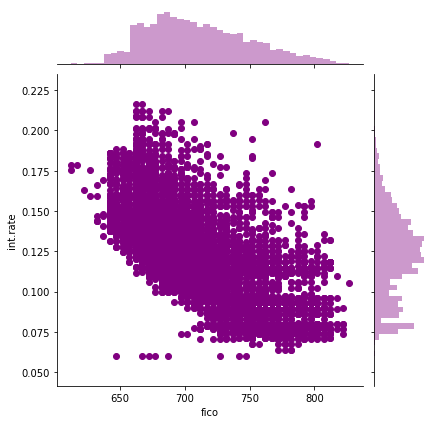

In [9]:
sns.jointplot(data=df, x='fico', y='int.rate', color='purple')

### Creating the following lmplots to see if the trend differed between not.fully.paid and credit.policy:

<Figure size 792x504 with 0 Axes>

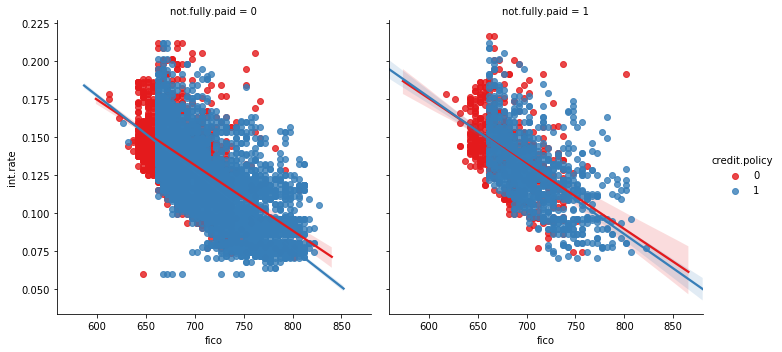

In [10]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy', col='not.fully.paid',palette='Set1')

## Setting up the Data for the ML models

Setting up the data for the Random Forest Classification and the Decision Tree models.

### Checking again the Dataframe info:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### The *'purpose'* column is a categorical feature. That means it needs to be transformed by using dummy variables so sklearn will be able to understand the categories of that feature:

#### I create a list of 1 element containing the string 'purpose'. I call this list categ_feats:

In [12]:
categ_feats = df['purpose']

In [13]:
categ_feats

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
5              credit_card
6       debt_consolidation
7                all_other
8         home_improvement
9       debt_consolidation
10      debt_consolidation
11      debt_consolidation
12      debt_consolidation
13          small_business
14      debt_consolidation
15          major_purchase
16               all_other
17             credit_card
18      debt_consolidation
19          major_purchase
20               all_other
21               all_other
22             credit_card
23             credit_card
24      debt_consolidation
25               all_other
26               all_other
27      debt_consolidation
28               all_other
29               all_other
               ...        
9548      home_improvement
9549      home_improvement
9550             all_other
9551      home_improvement
9552    debt_consolidation
9553    debt_consolidation
9

#### Now, I use pd.get_dummies() to create a fixed larger dataframe that has new feature columns with dummy variables. I set this dataframe as *dummy_data_purpose*:

In [14]:
dummy_data_purpose = pd.get_dummies(categ_feats, prefix='purpose', drop_first=True)  # I use drop_first to delete the 'all_others' column
dummy_data_purpose.head()

,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [15]:
dummy_data_purpose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 6 columns):
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9578 non-null uint8
purpose_small_business        9578 non-null uint8
dtypes: uint8(6)
memory usage: 56.2 KB


#### dropping the 'purpose' column:

In [16]:
df.drop('purpose', axis=1, inplace=True)

#### concatenating the main dataframe *'df'* with the *'dummy_data_purpose'* dataframe, to a new one called *final_data*. This dataframe is ready and set up to work as an input to the ML models:

In [17]:
final_data = pd.concat([df, dummy_data_purpose], axis=1, sort=False)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [18]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Train and Test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [22]:
# the features
X = final_data[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business']]

In [23]:
# the labeled data
y = final_data['not.fully.paid']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training the Decision Tree model

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
# creating the ML object
dtree = DecisionTreeClassifier()

In [27]:
# training the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of the Decision Tree

In [28]:
# making the predictions
predictions = dtree.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print('DT confusion matrix:')
print(confusion_matrix(y_test, predictions))

DT confusion matrix:
[[1996  435]
 [ 333  110]]


In [31]:
print('DT classification report:')
print(classification_report(y_test, predictions))

DT classification report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.25      0.22       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.73      0.74      2874



## Training the Random Forest model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# creating the ML object
rfm = RandomForestClassifier(n_estimators=600)

In [34]:
# training the model
rfm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation of the Random Forest

In [35]:
predictions_rf = rfm.predict(X_test)

In [36]:
print('RF confusion matrix:')
print(confusion_matrix(y_test, predictions_rf))

RF confusion matrix:
[[2421   10]
 [ 432   11]]


In [37]:
print('RF classification report:')
print(classification_report(y_test, predictions_rf))

RF classification report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.52      0.02      0.05       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



### What model performed better, the random forest or the decision tree?

It depends on what metric someone tries to optimize for:

e.g.
1) The **recall**: in Class 1 is better in DT than in RF
2) The **f1-score**: in Class 1 is better in DT than in RF
3) the **precision**: the RF did it better than the DT

It really depends on the data! Here, neither did very well, so more feature engineering is needed.